### Data Exploration :

In [1]:
import pandas as pd

In [2]:
location="../rawdata"

ames_data=pd.read_csv(location + "/train.csv")
test_data=pd.read_csv(location + "/test.csv")
ames_data.shape

(1460, 81)

In [3]:
ames_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
ames_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#Percent Missing Data
ames_data.isnull().sum()[ames_data.isnull().sum() != 0].sort_values(ascending=False) / 14.60

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

x=ames_data.drop(["SalePrice"], axis=1).copy()
y=ames_data["SalePrice"].copy()

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

### Decision Tree Model (excluding categorical variables) :

In [7]:
#Drop object type variables as these won't be accepted in sklearn tree
x_train_num = x_train.select_dtypes(exclude=['object'])
x_val_num = x_val.select_dtypes(exclude=['object'])
print(x_train_num.shape)

#Drop columns with missing values
columns_with_missing = [c for c in x_train_num.columns if x_train_num[c].isnull().any()]
x_train_reduced=x_train_num.drop(columns_with_missing, axis=1)
x_val_reduced=x_val_num.drop(columns_with_missing, axis=1)
print(x_train_reduced.shape)

(1168, 37)
(1168, 34)


In [8]:
from sklearn.tree import DecisionTreeRegressor

dtmodel=DecisionTreeRegressor()
dtmodel.fit(x_train_reduced, y_train)
predicted = dtmodel.predict(x_val_reduced)

from sklearn.metrics import mean_absolute_error

print("MAE from Approach 1 (Drop columns with missing values) : ", mean_absolute_error(y_val,predicted))

MAE from Approach 1 (Drop columns with missing values) :  28823.164383561645


In [9]:
from sklearn.impute import SimpleImputer

my_imputer=SimpleImputer()
imputed_x_train = pd.DataFrame(my_imputer.fit_transform(x_train_num))
imputed_x_val = pd.DataFrame(my_imputer.transform(x_val_num))

imputed_x_train.columns=x_train_num.columns
imputed_x_val.columns=x_val_num.columns

dtmodel.fit(imputed_x_train, y_train)
predicted = dtmodel.predict(imputed_x_val)

print("MAE from Approach 2 (Imputation) : ", mean_absolute_error(y_val,predicted))

MAE from Approach 2 (Imputation) :  29451.102739726026


In [10]:
x_train_nplus = x_train_num.copy()
x_val_nplus = x_val_num.copy()

for c in columns_with_missing:
    x_train_nplus[c + "_was_missing"] = x_train_nplus[c].isnull()
    x_val_nplus[c + "_was_missing"] = x_val_nplus[c].isnull()

imputed_x_train_plus = pd.DataFrame(my_imputer.fit_transform(x_train_nplus))
imputed_x_val_plus = pd.DataFrame(my_imputer.transform(x_val_nplus))

imputed_x_train_plus.columns=x_train_nplus.columns
imputed_x_val_plus.columns=x_val_nplus.columns

dtmodel.fit(imputed_x_train_plus, y_train)
predicted = dtmodel.predict(imputed_x_val_plus)

print("MAE from Approach 3 (An extension to Imputation) : ", mean_absolute_error(y_val,predicted))

MAE from Approach 3 (An extension to Imputation) :  28137.37671232877


### Random Forest Model (excluding columns with missing values) :

In [11]:
#Dropping columns with missing values(for simplicity)
columns_with_missing = [c for c in x_train.columns if x_train[c].isnull().any()]
x_train_v2 = x_train.drop(columns_with_missing, axis=1).copy()
x_val_v2 = x_val.drop(columns_with_missing, axis=1).copy()
print(x_train_v2.shape)

#"Cardinality" means the number of unique values in a column
#Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [c for c in x_train_v2.columns if x_train_v2[c].nunique() < 10 and x_train_v2[c].dtype=="object"]
#Select numerical columns
numerical_cols = [c for c in x_train_v2.columns if x_train_v2[c].dtype in ['int64', 'float64']]

x_train_v2 = x_train_v2[low_cardinality_cols + numerical_cols].copy()
x_val_v2 = x_val_v2[low_cardinality_cols + numerical_cols].copy()
print(x_train_v2.shape)

(1168, 61)
(1168, 58)


In [12]:
#Get list of categorical variables
s = (x_train_v2.dtypes=="object")
object_cols = list(s[s].index)

print("Categorical Variables :")
print(object_cols)

Categorical Variables :
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [13]:
from sklearn.ensemble import RandomForestRegressor

def score_rf100(x_tr, x_v, y_tr, y_v):
    rfmodel = RandomForestRegressor(n_estimators=100)
    rfmodel.fit(x_tr, y_tr)
    predicted = rfmodel.predict(x_v)
    return mean_absolute_error(y_v, predicted)

In [14]:
drop_X_train = x_train_v2.select_dtypes(exclude=['object'])
drop_X_val = x_val_v2.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables) : ", score_rf100(drop_X_train, drop_X_val, y_train, y_val))

MAE from Approach 1 (Drop categorical variables) :  19559.565513698628


In [15]:
from sklearn.preprocessing import LabelEncoder

label_x_train = x_train_v2.copy()
label_x_val = x_val_v2.copy()

my_encoder = LabelEncoder()

#LabelEncoder doesn't know how to handle unseen categories(hence using full data to train)
for c in object_cols:
    my_encoder.fit(x[c]) #Throws error on this line sometimes (perhaps due to some missing value that can't be typecasted)
    label_x_train[c] = my_encoder.transform(label_x_train[c])
    label_x_val[c] = my_encoder.transform(label_x_val[c])

print("MAE from Approach 2 (Label Encoding) : ", score_rf100(label_x_train, label_x_val, y_train, y_val))

MAE from Approach 2 (Label Encoding) :  19040.662842465757


In [16]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
oh_cols_train = pd.DataFrame(oh_encoder.fit_transform(x_train_v2[object_cols]))
oh_cols_val = pd.DataFrame(oh_encoder.transform(x_val_v2[object_cols]))

oh_cols_train.index = x_train_v2.index
oh_cols_val.index = x_val_v2.index

x_train_num2 = x_train_v2.drop(object_cols, axis=1)
x_val_num2 = x_val_v2.drop(object_cols, axis=1)

oh_x_train = pd.concat([x_train_num2, oh_cols_train], axis=1)
oh_x_val = pd.concat([x_val_num2, oh_cols_val], axis=1)

print("MAE from Approach 3 (One-Hot Encoding) : ", score_rf100(oh_x_train, oh_x_val, y_train, y_val))

MAE from Approach 3 (One-Hot Encoding) :  18841.7852739726


### Final Random Forest :
#### (All the missing values handled and including categorical variables)

In [17]:
x_train_finalv1 = x_train.copy()
x_val_finalv1 = x_val.copy()
print(x_train_finalv1.shape)

numerical_cols = [c for c in x_train_finalv1.columns if x_train_finalv1[c].dtypes in ['int64', 'float64']]
low_cardinality_cols = [c for c in x_train_finalv1.columns if x_train_finalv1[c].nunique()<10 and x_train_finalv1[c].dtype=='object']
ext_impute_cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "LotFrontage", "GarageYrBlt"]

#Task 2 :
for col in ext_impute_cols:
    x_train_finalv1[col + "_was_missing"] = x_train_finalv1[col].isnull()
    x_val_finalv1[col + "_was_missing"] = x_val_finalv1[col].isnull()

data2_train = x_train_finalv1[[i+"_was_missing" for i in ext_impute_cols]].copy()
data2_val = x_val_finalv1[[i+"_was_missing" for i in ext_impute_cols]].copy()

#Task 1 :
num_imputer = SimpleImputer() #index is included below as it was getting reset in the new dataframe
data1_train = pd.DataFrame(num_imputer.fit_transform(x_train_finalv1[numerical_cols]), index=x_train_finalv1.index)
data1_val = pd.DataFrame(num_imputer.transform(x_val_finalv1[numerical_cols]), index=x_val_finalv1.index)

data1_train.columns = x_train_finalv1[numerical_cols].columns
data1_val.columns = x_val_finalv1[numerical_cols].columns

#Task 3a :
char_imputer = SimpleImputer(strategy='most_frequent') #index is included below as it was getting reset in the new dataframe
data3a_train = pd.DataFrame(char_imputer.fit_transform(x_train_finalv1[low_cardinality_cols]), index=x_train_finalv1.index)
data3a_val = pd.DataFrame(char_imputer.transform(x_val_finalv1[low_cardinality_cols]), index=x_val_finalv1.index)

data3a_train.columns = x_train_finalv1[low_cardinality_cols].columns
data3a_val.columns = x_val_finalv1[low_cardinality_cols].columns

#Task 3b :
oh_encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
data3b_train = pd.DataFrame(oh_encoder.fit_transform(data3a_train))
data3b_val = pd.DataFrame(oh_encoder.transform(data3a_val))

data3b_train.index = data3a_train.index
data3b_val.index = data3a_val.index

#Final Data :
x_train_finalv2 = pd.concat([data1_train, data2_train, data3b_train], axis=1)
x_val_finalv2 = pd.concat([data1_val, data2_val, data3b_val], axis=1)
print(x_train_finalv2.shape)

(1168, 80)
(1168, 239)


In [18]:
print(x_train_finalv1.shape)
print(data1_train.shape)
print(data2_train.shape)
print(data3a_train.shape)
print(data3b_train.shape)
print(x_train_finalv2.shape)

(1168, 87)
(1168, 37)
(1168, 7)
(1168, 40)
(1168, 195)
(1168, 239)


In [43]:
#Function for HyperParameter Tuning :

def get_mae(ntree, x_tr, x_v, y_tr, y_v):
    model = RandomForestRegressor(n_estimators=ntree)
    model.fit(x_tr, y_tr)
    predicted = model.predict(x_v)
    mae_val = mean_absolute_error(y_v, predicted)
    predicted = model.predict(x_tr)
    mae_train = mean_absolute_error(y_tr, predicted)
    return mae_train, mae_val


In [44]:
cv_curve = []
for ntree in range(10,501,10):
    mae_train, mae_val = get_mae(ntree, x_train_finalv2, x_val_finalv2, y_train, y_val)
    #print("Number of Trees : %d \t Mean Absolute Error (Train) : %d \t Mean Absolute Error (Train) : %d" %(ntree,mae_train,mae_val))
    cv_curve.append((ntree,mae_train, mae_val))

cv_curve = pd.DataFrame(cv_curve, columns=["TreeCount", "MAE_train", "MAE_val"])
cv_curve.head()

,TreeCount,MAE_train,MAE_val
0,10,7703.674572,20673.575685
1,20,7347.745933,20059.202911
2,30,6912.865753,19680.591895
3,40,6902.243622,18876.311901
4,50,6724.757260,19259.140822


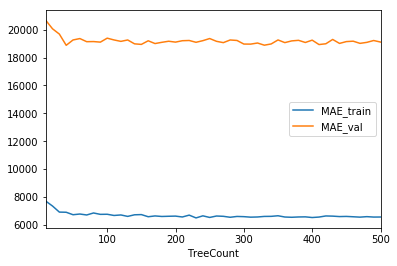

In [45]:
from matplotlib import pyplot as plt
%matplotlib inline

cv_curve.plot(x="TreeCount", y=["MAE_train", "MAE_val"])

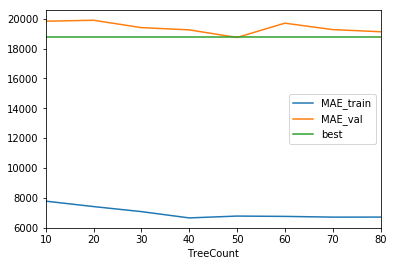

In [46]:
cv_curve = []
for ntree in range(10,81,10):
    mae_train, mae_val = get_mae(ntree, x_train_finalv2, x_val_finalv2, y_train, y_val)
    cv_curve.append((ntree,mae_train, mae_val))

cv_curve = pd.DataFrame(cv_curve, columns=["TreeCount", "MAE_train", "MAE_val"])

#Plot to get an idea of best Treecount
cv_curve["best"] = cv_curve.MAE_val.min()
cv_curve.plot(x="TreeCount", y=["MAE_train", "MAE_val", "best"])

In [47]:
rfmodel = RandomForestRegressor(n_estimators = 50)
rfmodel.fit(x_train_finalv2,y_train)
predicted = rfmodel.predict(x_val_finalv2)
print("MAE after n_estimators optimisation : ",mean_absolute_error(y_val, predicted))

MAE after n_estimators optimisation :  19176.139109589043


In [56]:
features = pd.DataFrame({"Feature" : list(x_train_finalv2.columns),
                         "Importance" : rfmodel.feature_importances_})
features.sort_values(ascending=False, by="Importance", inplace=True)
features.head()

,Feature,Importance
4,OverallQual,0.573057
16,GrLivArea,0.117323
9,BsmtFinSF1,0.042634
12,TotalBsmtSF,0.038700
26,GarageCars,0.023373


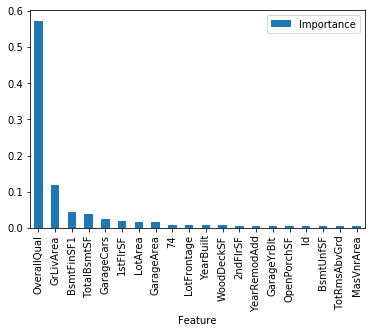

In [59]:
features.head(20).plot.bar(x="Feature", y="Importance")

#### Random Forest with selected features :

In [75]:
#Using 25 most important variables :
imp_vars = list(features["Feature"][:26])
imp_vars.remove('Id')
rfmodel2 = RandomForestRegressor(n_estimators = 50)
rfmodel2.fit(x_train_finalv2[imp_vars],y_train)
predicted = rfmodel2.predict(x_val_finalv2[imp_vars])
print("MAE after feature selection : ",mean_absolute_error(y_val, predicted))

MAE after feature selection :  19106.43479452055


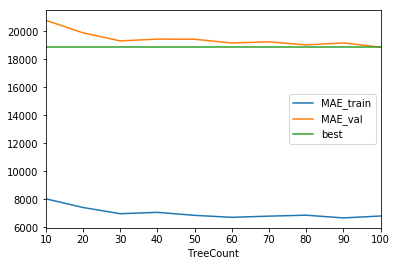

In [74]:
cv_curve = []
for ntree in range(10,101,10):
    mae_train, mae_val = get_mae(ntree, x_train_finalv2[imp_vars], x_val_finalv2[imp_vars], y_train, y_val)
    cv_curve.append((ntree,mae_train, mae_val))

cv_curve = pd.DataFrame(cv_curve, columns=["TreeCount", "MAE_train", "MAE_val"])

cv_curve["best"] = cv_curve.MAE_val.min()
cv_curve.plot(x="TreeCount", y=["MAE_train", "MAE_val", "best"])

In [76]:
rfmodel2 = RandomForestRegressor(n_estimators = 75)
rfmodel2.fit(x_train_finalv2[imp_vars],y_train)
predicted = rfmodel2.predict(x_val_finalv2[imp_vars])
print("MAE after n_estimators optimisation and feature selection : ",mean_absolute_error(y_val, predicted))

MAE after n_estimators optimisation and feature selection :  18895.41319634703


### Prediction on Test Data (Kaggle Submission) :

In [77]:
test_finalv1 = test_data.copy()

numerical_cols = [c for c in test_finalv1.columns if test_finalv1[c].dtypes in ['int64', 'float64']]
low_cardinality_cols = [c for c in test_finalv1.columns if test_finalv1[c].nunique()<10 and test_finalv1[c].dtype=='object']
ext_impute_cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "LotFrontage", "GarageYrBlt"]

#Task 2 :
for col in ext_impute_cols:
    test_finalv1[col + "_was_missing"] = test_finalv1[col].isnull()

data2_test = test_finalv1[[i+"_was_missing" for i in ext_impute_cols]].copy()

#Task 1 :
data1_test = pd.DataFrame(num_imputer.transform(test_finalv1[numerical_cols]), index=test_finalv1.index)

data1_test.columns = test_finalv1[numerical_cols].columns

#Task 3a :
data3a_test = pd.DataFrame(char_imputer.transform(test_finalv1[low_cardinality_cols]), index=test_finalv1.index)

data3a_test.columns = test_finalv1[low_cardinality_cols].columns

#Task 3b :
data3b_test = pd.DataFrame(oh_encoder.transform(data3a_test))

data3b_test.index = data3a_test.index

#Final Data :
x_test_finalv2 = pd.concat([data1_test, data2_test, data3b_test], axis=1)

In [88]:
predicted = rfmodel2.predict(x_test_finalv2[imp_vars])
submission = pd.DataFrame({"Id" : list(x_test_finalv2.Id),
                          "SalePrice" : predicted})
submission.dtypes

Id           float64
SalePrice    float64
dtype: object

In [93]:
submission = submission.astype({'Id' : 'int32', 'SalePrice' : 'float32'})
submission.to_csv(location + "/submission_v1.csv", index=False)
#Rank : 3674/5395 (score : 0.15840)